In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['font.sans-serif'] = "Myriad Pro"

In [2]:
filename = 'FigS1_data.xlsx'
xl = pd.ExcelFile(filename)
print(xl.sheet_names)

['FigS1_raw_data']


In [3]:
raw_od = xl.parse('FigS1_raw_data', index_col = None, header = None, skiprows = 37).iloc[:50,]
display(raw_od.head())
display(raw_od.tail())

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,B2,0.0531,0.0527,0.0526,0.0525,0.0525,0.0526,0.0528,0.0531,0.0535,...,0.5787,0.5787,0.5787,0.5785,0.5786,0.5785,0.5785,0.5787,0.5787,0.5794
1,B3,0.0539,0.0535,0.0533,0.0533,0.0533,0.0534,0.0536,0.0538,0.0542,...,0.5649,0.5651,0.5657,0.5656,0.5660,0.5664,0.5665,0.5677,0.5673,0.5678
2,B4,0.0532,0.0529,0.0527,0.0534,0.0533,0.0528,0.0530,0.0532,0.0536,...,0.5780,0.5772,0.5778,0.5774,0.5776,0.5779,0.5781,0.5784,0.5784,0.5788
3,B5,0.0535,0.0533,0.0531,0.0531,0.0531,0.0531,0.0533,0.0536,0.0539,...,0.5545,0.5548,0.5549,0.5550,0.5551,0.5553,0.5553,0.5558,0.5559,0.5562
4,B6,0.0525,0.0522,0.0521,0.0521,0.0521,0.0522,0.0523,0.0526,0.0529,...,0.5629,0.5639,0.5633,0.5633,0.5636,0.5638,0.5640,0.5645,0.5648,0.5651


,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
45,F7,0.0534,0.0532,0.0530,0.0531,0.0531,0.0531,0.0533,0.0536,0.0539,...,0.4790,0.4796,0.4804,0.4808,0.4815,0.4829,0.4827,0.4837,0.4843,0.4853
46,F8,0.0533,0.0530,0.0529,0.0530,0.0530,0.0529,0.0531,0.0541,0.0537,...,0.4824,0.4827,0.4830,0.4831,0.4835,0.4837,0.4840,0.4845,0.4847,0.4852
47,F9,0.0535,0.0532,0.0531,0.0531,0.0532,0.0532,0.0533,0.0537,0.0540,...,0.4928,0.4932,0.4932,0.4934,0.4937,0.4940,0.4943,0.4948,0.4947,0.4950
48,F10,0.0538,0.0534,0.0534,0.0538,0.0535,0.0534,0.0536,0.0539,0.0542,...,0.4760,0.4762,0.4764,0.4765,0.4771,0.4772,0.4774,0.4782,0.4782,0.4787
49,F11,0.0535,0.0527,0.0527,0.0528,0.0528,0.0528,0.0529,0.0533,0.0536,...,0.4985,0.4991,0.4995,0.4997,0.5003,0.5005,0.5004,0.5016,0.5015,0.5020


In [4]:
time = xl.parse('FigS1_raw_data', index_col = None, header = None, skiprows = 35).iloc[0,1:]
time = time/3600
time


1            0.0
2       0.166694
3       0.333389
4       0.500083
5        0.66675
         ...    
284    47.171833
285    47.338528
286    47.505222
287    47.671889
288    47.838583
Name: 0, Length: 288, dtype: object

In [5]:
# transform to long form
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

od = raw_od.copy()
od.columns = time_header

strain = np.repeat(np.array(['ptetCas9-SC101', 'ptetCas9-15A', 'ptetCas9-ColE1', 
                   'ptetCas9-ssrA-SC101', 'ptet(RBS32)Cas9-ssrA-SC101']), 10)

atcs = np.tile(np.repeat(np.array([0, 100]), 5), 5)

media = np.tile(np.repeat(np.array(['Cm', 'Cm + ATc']), 5), 5)

replicateID = np.tile(np.array([1,2,3,4,5]), 10)

od.insert(1, 'strain', strain)
od.insert(1, 'ATc', atcs)
od.insert(1, 'media', media)
od.insert(1, 'replicate', replicateID)

# onto long form
od_long = pd.melt(od, id_vars = ['wellID','strain','ATc','media','replicate'], value_name = 'OD600')
od_long.rename(columns = {'variable':'hours'}, inplace = True)
od_long.OD600 = od_long.OD600.astype(float)
od_long.hours = od_long.hours.astype(float)

od_long


,wellID,strain,ATc,media,replicate,hours,OD600
0,B2,ptetCas9-SC101,0,Cm,1,0.000000,0.0531
1,B3,ptetCas9-SC101,0,Cm,2,0.000000,0.0539
2,B4,ptetCas9-SC101,0,Cm,3,0.000000,0.0532
3,B5,ptetCas9-SC101,0,Cm,4,0.000000,0.0535
4,B6,ptetCas9-SC101,0,Cm,5,0.000000,0.0525
...,...,...,...,...,...,...,...
14395,F7,ptet(RBS32)Cas9-ssrA-SC101,100,Cm + ATc,1,47.838583,0.4853
14396,F8,ptet(RBS32)Cas9-ssrA-SC101,100,Cm + ATc,2,47.838583,0.4852
14397,F9,ptet(RBS32)Cas9-ssrA-SC101,100,Cm + ATc,3,47.838583,0.4950
14398,F10,ptet(RBS32)Cas9-ssrA-SC101,100,Cm + ATc,4,47.838583,0.4787


In [6]:
def growth_rate(df, lower_od, upper_od):
    # df contains all wells for each variant 
    # calculates growth rate (for each replicates)
    # outputs a new dataframe (new_df) whose final column is the calculated growth rate for each replicate
    # also outputs the actual OD values and the corresponding time from which the growth rates are calculated (sanity check)

    # target OD's 
    # upper_od = 0.2
    # lower_od = 0.1
    
    # extract unique wellID's so we can iterate over them
    unique_wellID = df.wellID.unique()
    
    # initialize output
    hour_p2 = np.zeros(len(unique_wellID)) # times at which OD600 crosses 0.2
    hour_p1 = np.zeros(len(unique_wellID)) # times at which OD600 crosses 0.1

    # iterate and extract desired values 
    for i,u in enumerate(unique_wellID):
        well_df = df[df['wellID']==u]
        
        od_high_p2 = well_df[well_df['OD600']>=upper_od]['OD600'].iloc[0] # smallest OD that's equal to or greater than upper_od
        od_low_p2 = well_df[well_df['OD600']<=upper_od]['OD600'].iloc[-1] # largest OD that's equal to or smaller than upper_od
        t_high_p2 = well_df[well_df['OD600']>=upper_od]['hours'].iloc[0]
        t_low_p2 = well_df[well_df['OD600']<=upper_od]['hours'].iloc[-1]
        
        upper_t = np.interp(upper_od, [od_low_p2, od_high_p2],[t_low_p2, t_high_p2])
        hour_p2[i] = upper_t
        
        od_high_p1 = well_df[well_df['OD600']>=lower_od]['OD600'].iloc[0] # smallest OD that's equal to or greater than lower_od
        od_low_p1 = well_df[well_df['OD600']<=lower_od]['OD600'].iloc[-1] # largest OD that's equal to or smaller than lower_od
        t_high_p1 = well_df[well_df['OD600']>=lower_od]['hours'].iloc[0]
        t_low_p1 = well_df[well_df['OD600']<=lower_od]['hours'].iloc[-1]

        lower_t = np.interp(lower_od, [od_low_p1, od_high_p1],[t_low_p1, t_high_p1])
        hour_p1[i] = lower_t
    
    # calculate growth rates 
    hour_diff = hour_p2 - hour_p1
    gr_rate = np.log(upper_od/lower_od)/hour_diff

    new_df = df[['wellID','strain','ATc','media','replicate']].drop_duplicates()
    new_df['growth_rate'] = gr_rate
    
    return new_df



In [7]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.05
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

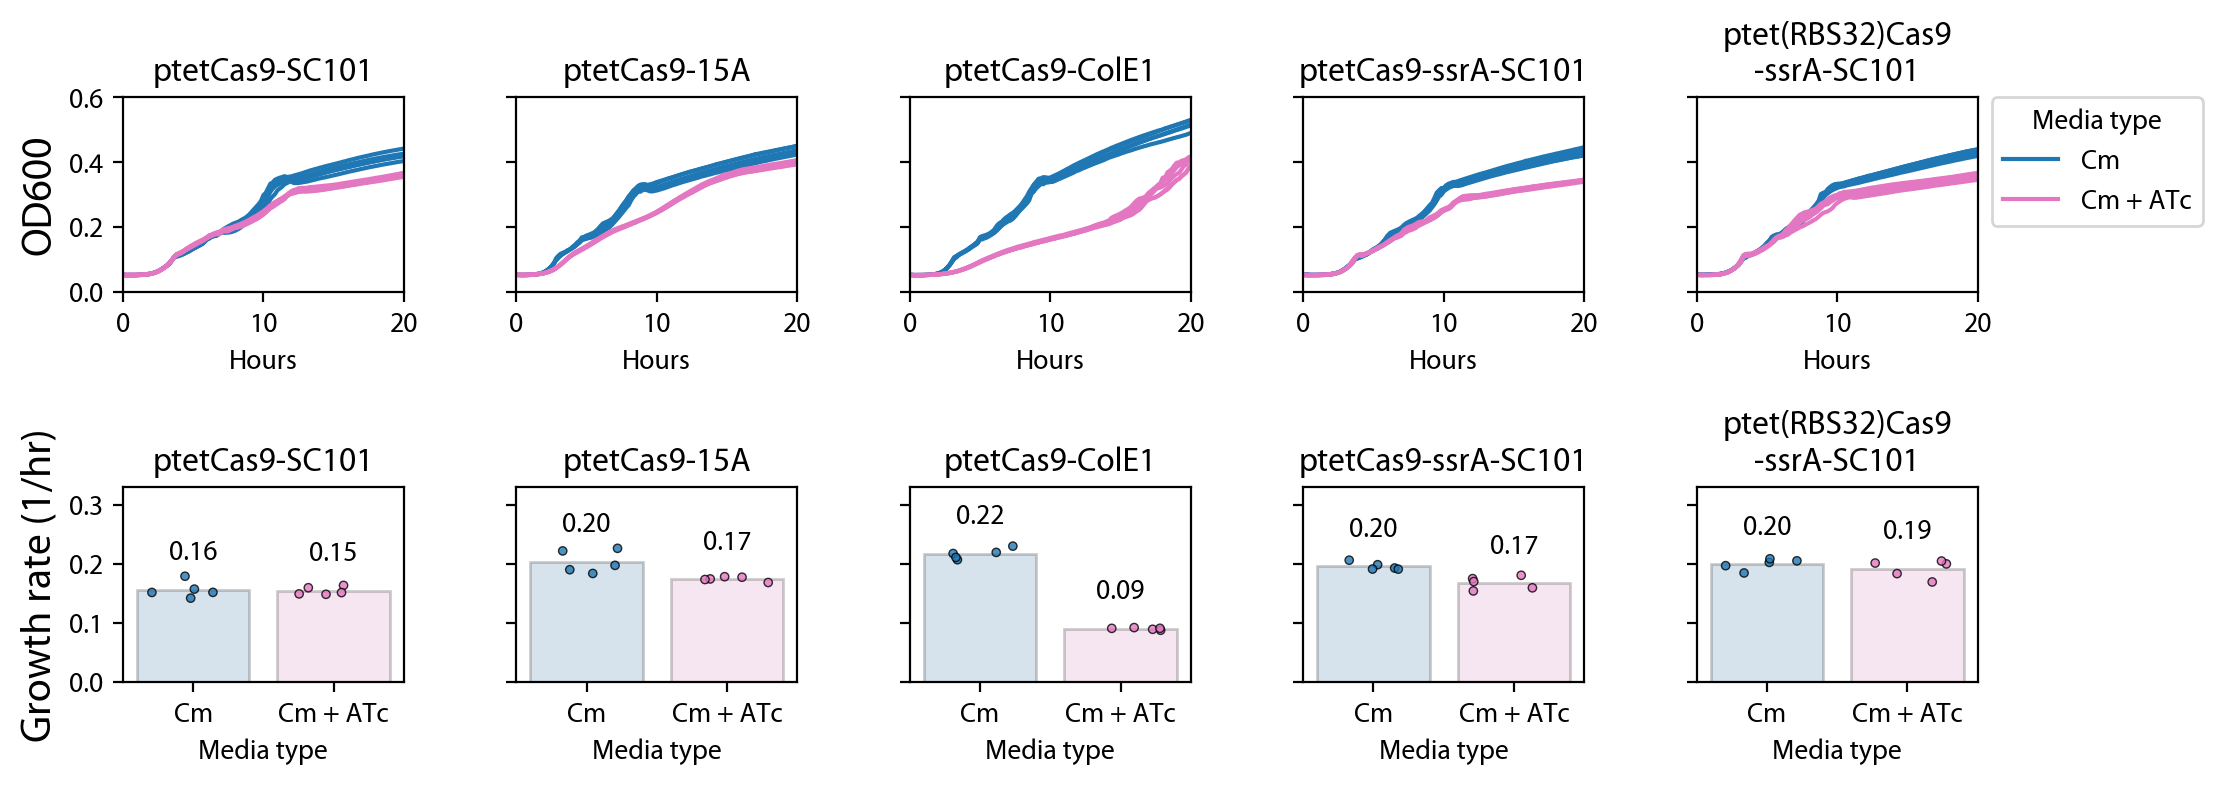

In [8]:
fig, axes = plt.subplots(2,5, figsize = (10,3.5), sharey = 'row', sharex = 'row', dpi=200)
plt.tight_layout()
plt.subplots_adjust(hspace=1, wspace = 0.4)

df = od_long

pal = [sns.color_palette()[0], sns.color_palette()[6]]

st_order = np.array(['ptetCas9-SC101', 'ptetCas9-15A', 'ptetCas9-ColE1', 
                   'ptetCas9-ssrA-SC101', 'ptet(RBS32)Cas9-ssrA-SC101'])

for st, ax in zip(st_order,axes.flatten()[:5]):
    sns.lineplot(data = df[df['strain']==st], 
                x = 'hours', y = 'OD600', estimator = None, ax = ax, units = 'wellID',
                  hue = 'media', palette=pal, )

    ax.set_title(st)
    ax.set_ylim([0, .6])
    ax.set_xlim([0, 20])
    ax.set_xlabel('Hours')
    ax.get_legend().remove()
axes[0,0].set_ylabel('OD600', fontsize = 15)
axes[0,4].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Media type')
axes[0,4].set_title('ptet(RBS32)Cas9\n-ssrA-SC101')

for c, ax in zip(st_order,axes.flatten()[5:]):

    df = growth_rate(od_long[(od_long['strain'] == c)], 0.1, 0.2)

    sns.barplot(data = df, x = 'media', y = 'growth_rate', errorbar=None, ax=ax, hue = 'media', palette=pal, alpha = 0.2, edgecolor = 'black')
    sns.stripplot(data = df, x = 'media', y = 'growth_rate', hue = 'media', ax = ax, palette=pal, 
                edgecolor = 'black', linewidth = 0.5, s = 3, alpha = 0.8, jitter = .3)
    ax.set_title(c, fontsize = 12)
    ax.set_ylim([0, 0.33])
    ax.set_yticks([0, 0.1, 0.2, 0.3])
    ax.set_ylabel('Growth rate (1/hr)', fontsize = 15)
    ax.set_xlabel('Media type')
    show_values_on_bars(ax)
axes[1,0].set_ylabel('Growth rate (1/hr)', fontsize = 15)
axes[1,4].set_title('ptet(RBS32)Cas9\n-ssrA-SC101')

plt.show()
